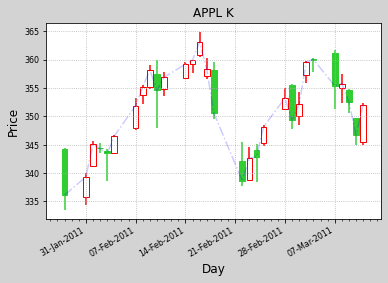

In [42]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
	dmy = str(dmy, encoding='utf-8')
	time = datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates, opening_prices,highest_prices, \
	lowest_prices, closeing_prices  = np.loadtxt('./data/aapl.csv',  # 读取文件
                  delimiter=',',  # 分隔符
                  usecols=(1, 3, 4, 5, 6),  # 要读取的列
                  dtype='M8[D], f8, f8, f8, f8',  # 每个维度的数据类型
                  unpack=True,  # 拆包
                  converters={1: dmy2ymd}  # 自定第几列使用的转换函数
                  )
# print(data)
plt.figure('APPL K', facecolor='lightgray')
plt.title('APPL K')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(linestyle=':')

#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( md.WeekdayLocator(byweekday=md.MO) )
ax.xaxis.set_major_formatter(md.DateFormatter('%d-%b-%Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(md.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(md.datetime.datetime)  # numpy数据类型转换

plt.plot(dates, closeing_prices, color='blue', linestyle='-.', alpha=0.2)
plt.gcf().autofmt_xdate()  # 自动格式话x轴日期

#绘制每一天的蜡烛图
#填充色：涨为白色，跌为绿色
rise = closeing_prices >= opening_prices
color = np.array(['white' if x else 'limegreen' for x in rise])

#边框色：涨为红色，跌为绿色
edgecolor = np.array(['red' if x else 'limegreen' for x in rise])

#绘制线条
plt.vlines(dates, lowest_prices, highest_prices, color=edgecolor, zorder=0)
#绘制方块
plt.bar(dates, closeing_prices - opening_prices, 0.8,
	opening_prices, color=color, edgecolor=edgecolor)

plt.show()

In [43]:
import numpy as np
array = np.random.normal(10, 2, 100)
np.mean(array)  # 计算array的均值

9.826075856066856

In [47]:
import numpy as np
from datetime import datetime


# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
    dmy = str(dmy, encoding='utf-8')
    time = datetime.strptime(dmy, '%d-%m-%Y').date()
    t = time.strftime('%Y-%m-%d')
    return t


closeing_prices = np.loadtxt('./data/aapl.csv',  # 读取文件
                             delimiter=',',  # 分隔符
                             usecols=(6,),  # 要读取的列
                             dtype='f8',
                             # 每个维度的数据类型
                             unpack=True,  # 拆包
                             # converters={1: dmy2ymd}
                             # 自定第几列使用的转换函数
                             )

mean = 0
for closing_price in closeing_prices:
    mean += closing_price
mean /= closeing_prices.size
print(mean)
mean = np.mean(closeing_prices)
print(mean)

351.03766666666667
351.0376666666667


In [48]:
import numpy as np
array = np.random.normal(10, 2, 100)
weights = np.random.random(100)
np.average(array, weights=weights)

10.30972364390164

In [49]:
import numpy as np
closing_prices, volumes = np.loadtxt(
    './data/aapl.csv', delimiter=',',
    usecols=(6, 7), unpack=True)
vwap, wsum = 0, 0
for closing_price, volume in zip(
        closing_prices, volumes):
    vwap += closing_price * volume
    wsum += volume
vwap /= wsum
print(vwap)
vwap = np.average(closing_prices, weights=volumes)
print(vwap)

350.5895493532009
350.5895493532009
